In [1]:
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt
import math
import time
from keras.datasets import mnist

In [2]:
n_samples = 100

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images[:n_samples]
train_labels = train_labels[:n_samples]

test_images = test_images[:n_samples]
test_labels = test_labels[:n_samples]

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

In [3]:
def getEuclideanDistance(single_point,array):
    nrows, ncols, nfeatures=array.shape[0],array.shape[1], array.shape[2]
    points=array.reshape((nrows*ncols,nfeatures))
                         
    dist = (points - single_point)**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)

    dist=dist.reshape((nrows,ncols))
    return dist

In [4]:

mu, sigma = 0, 0.1
A = np.random.normal(mu, sigma, 10)
#A.shape, A

In [5]:
nrows,ncols,nfeatures=3,3,3

#Generate coordinate system
x,y=np.meshgrid(range(ncols),range(nrows))

In [6]:

sgm0=2
sgmdecay=0.05
t=1
sgm = sgm0 * math.exp(-t*sgmdecay);

width = math.ceil(sgm*3)

dist=np.array([[2,1,3],[3,2,3],[4,4,4]])
bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) 

g = np.exp(-((np.power(x - bmucol,2)) + (np.power(y - bmurow,2))) / (2*sgm*sgm));


fromrow = max(0,bmurow - width);
torow   = min(bmurow + width,nrows);
fromcol = max(0,bmucol - width);
tocol   = min(bmucol + width,ncols);



In [7]:
G = np.dstack([g[fromrow:torow,fromcol:tocol]]*nfeatures);



In [8]:
def SOM (dispRes, trainingData, ndim=10, nepochs=10, eta0=0.1, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=0):
    nfeatures=trainingData.shape[1]
    ntrainingvectors=trainingData.shape[0]
    
    nrows = ndim
    ncols = ndim
    
    mu, sigma = 0, 0.1
    numpy.random.seed(int(time.time()))
    som = np.random.normal(mu, sigma, (nrows,ncols,nfeatures))

    if showMode >= 1:
        print("\nSOM features before training: \n")
        
        fig, ax=plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
        
        for k in range(nrows):
            for l in range (ncols):
                A=som[k,l,:].reshape((dispRes[0],dispRes[1]))
                ax[k,l].imshow(A,cmap="plasma")
                ax[k,l].set_yticks([])
                ax[k,l].set_xticks([])   
    
    #Generate coordinate system
    x,y=np.meshgrid(range(ncols),range(nrows))
    
    
    for t in range (1,nepochs+1):
        #Compute the learning rate for the current epoch
        eta = eta0 * math.exp(-t*etadecay);
        
        #Compute the variance of the Gaussian (Neighbourhood) function for the ucrrent epoch
        sgm = sgm0 * math.exp(-t*sgmdecay);
        
        #Consider the width of the Gaussian function as 3 sigma
        width = math.ceil(sgm*3);
        
        for ntraining in range(ntrainingvectors):
            trainingVector = trainingData[ntraining,:];
            
            # Compute the Euclidean distance between the training vector and
            # each neuron in the SOM map
            dist = getEuclideanDistance(trainingVector, som);
       
            # Find 2D coordinates of the Best Matching Unit (bmu)
            bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) ;
            
            
            #Generate a Gaussian function centered on the location of the bmu
            g = np.exp(-((np.power(x - bmucol,2)) + (np.power(y - bmurow,2))) / (2*sgm*sgm));

            #Determine the boundary of the local neighbourhood
            fromrow = max(0,bmurow - width);
            torow   = min(bmurow + width,nrows);
            fromcol = max(0,bmucol - width);
            tocol   = min(bmucol + width,ncols);

            
            #Get the neighbouring neurons and determine the size of the neighbourhood
            neighbourNeurons = som[fromrow:torow,fromcol:tocol,:];
            sz = neighbourNeurons.shape;
            
            #Transform the training vector and the Gaussian function into 
            # multi-dimensional to facilitate the computation of the neuron weights update
            T = np.matlib.repmat(trainingVector,sz[0]*sz[1],1).reshape((sz[0],sz[1],nfeatures));                   
            G = np.dstack([g[fromrow:torow,fromcol:tocol]]*nfeatures);

            # Update the weights of the neurons that are in the neighbourhood of the bmu
            neighbourNeurons = neighbourNeurons + eta * G * (T - neighbourNeurons);

            
            #Put the new weights of the BMU neighbouring neurons back to the
            #entire SOM map
            som[fromrow:torow,fromcol:tocol,:] = neighbourNeurons;

    if showMode >= 1:
        print("\nSOM features AFTER training: \n")
        
        fig, ax=plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
        
        for k in range(nrows):
            for l in range (ncols):
                A=som[k,l,:].reshape((dispRes[0],dispRes[1]))
                ax[k,l].imshow(A,cmap="plasma")
                ax[k,l].set_yticks([])
            ax[k,l].set_xticks([])   
    return som
    

In [9]:
import pandas as pd
def parse_input_zoo_data(filename, header='infer'):

    input_data = pd.read_csv(filename, header=header)

    classes = input_data[17].tolist()
    labels = input_data[0].tolist()
    input_database = {
        0: input_data[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]].to_numpy()
    }

    return input_database, labels, classes

In [10]:
input_filename = 'zoo.txt'
input_vector_database, labels, classes = parse_input_zoo_data(input_filename,None)







SOM features before training: 




SOM features AFTER training: 



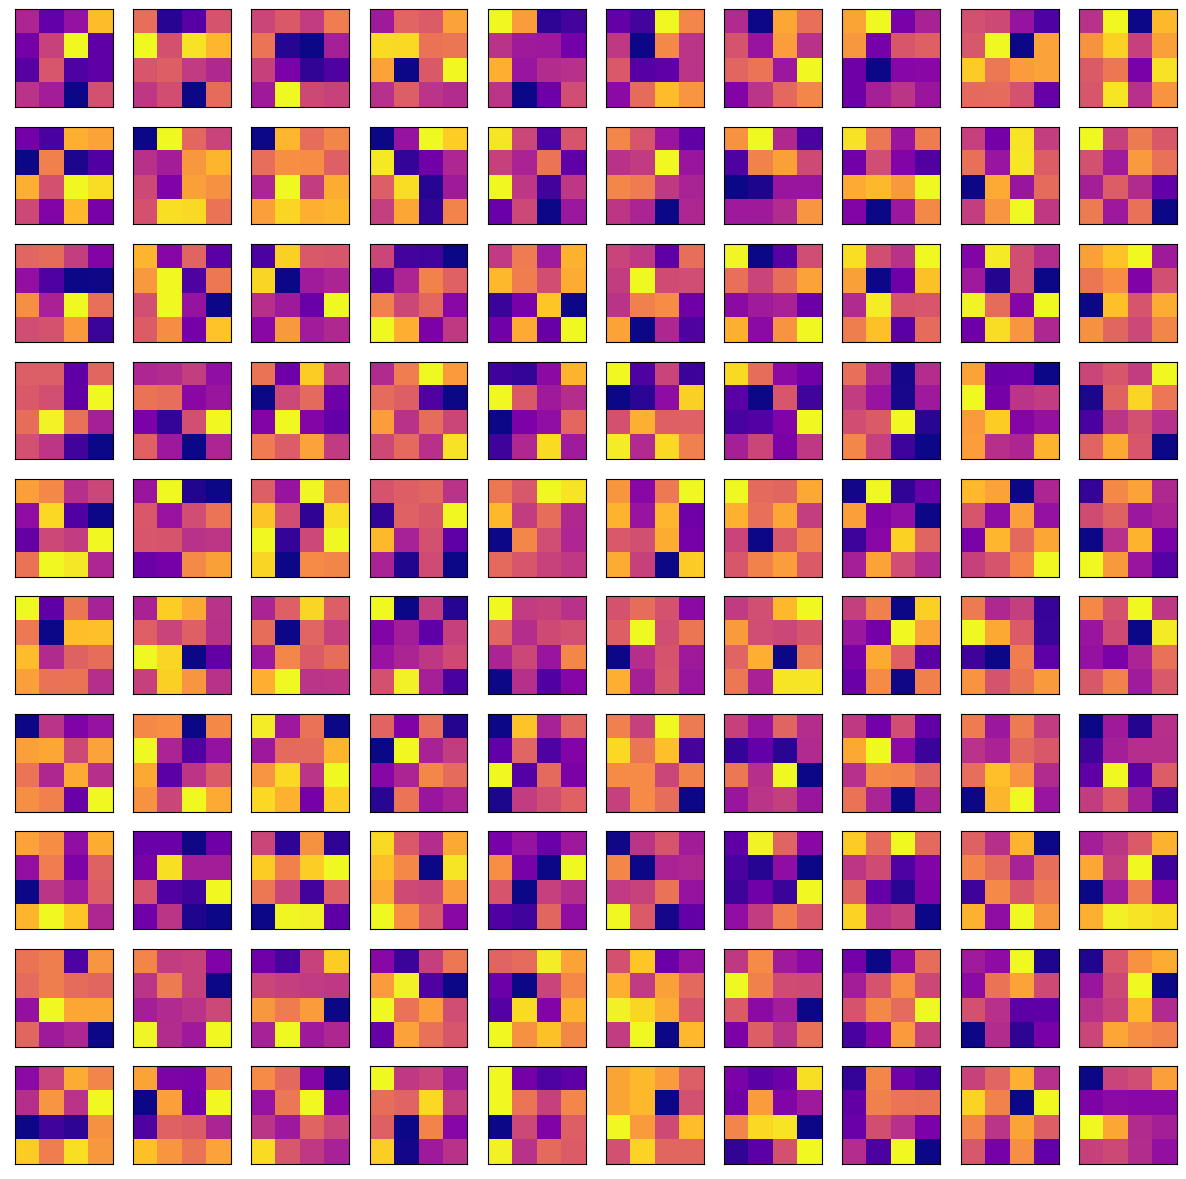

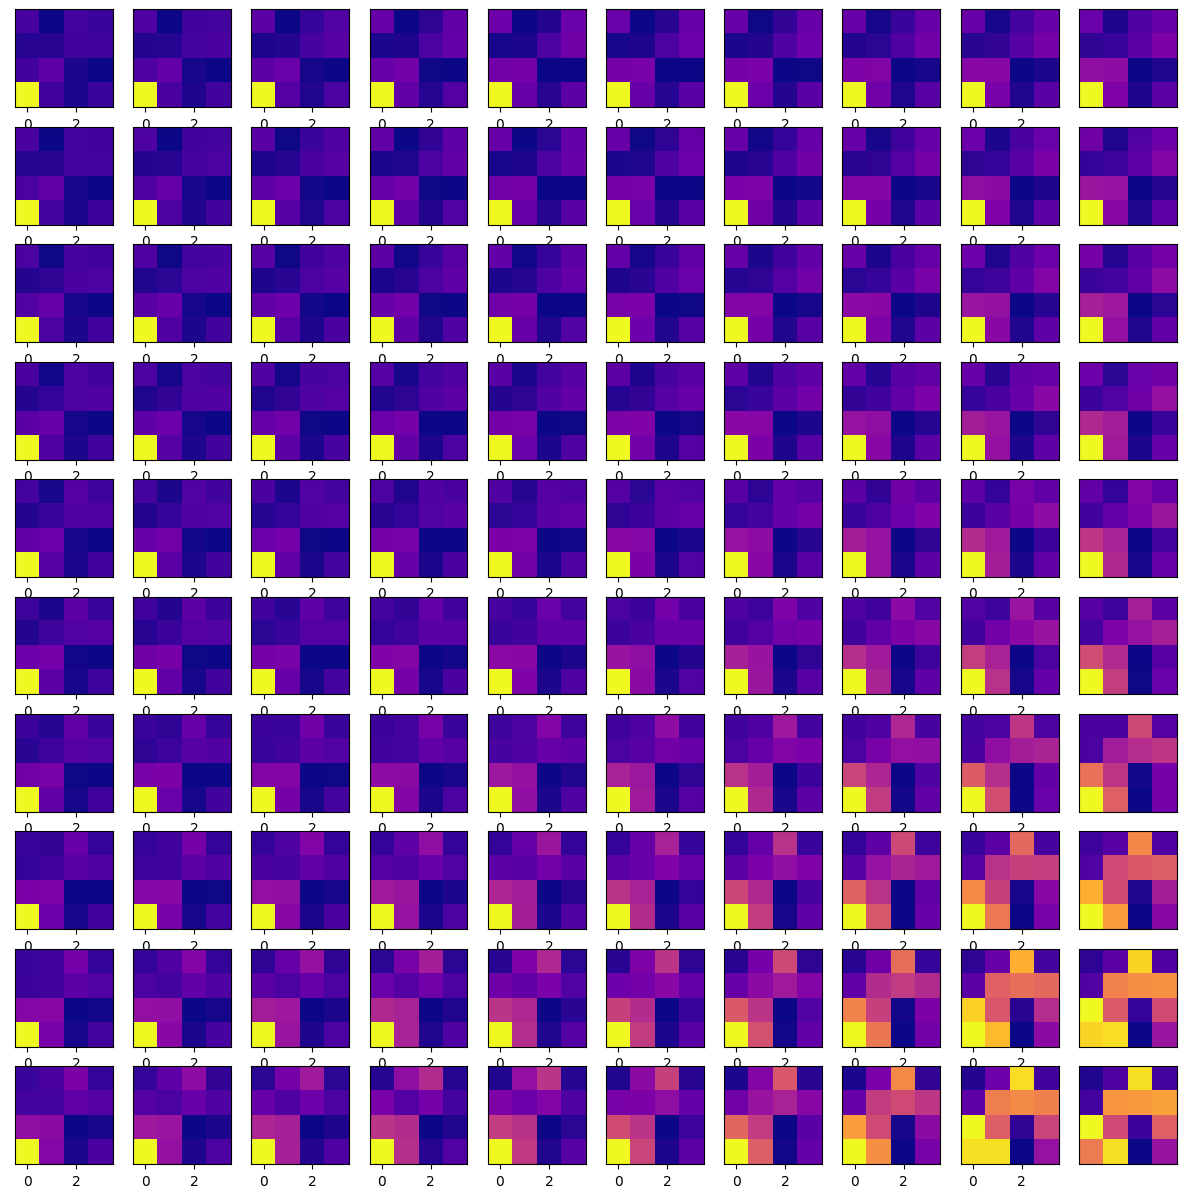

In [11]:
som_trained=SOM ([4,4],input_vector_database[0], ndim=10, nepochs=100, eta0=0.01, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=1)



SOM features before training: 


SOM features AFTER training: 

[[[ 5.44653750e-33 -9.29035390e-33 -8.68659588e-34 ... -7.50361508e-33
   -1.01681843e-32  5.90381360e-33]
  [ 2.44651626e-33  1.94963348e-33  1.26934512e-33 ... -2.70488114e-34
   -1.39692610e-33 -1.01906463e-34]
  [-7.16252223e-34 -1.65814292e-33 -4.15858055e-34 ... -5.89024683e-34
    6.41111117e-34  4.38707878e-35]
  ...
  [-6.23825362e-30 -3.05013801e-30  6.57893206e-30 ...  4.98806717e-30
    3.53624177e-30 -2.94202961e-30]
  [-1.40734633e-29  2.28384771e-29 -1.21145373e-30 ...  9.31561222e-31
    4.04209607e-29 -3.17876585e-29]
  [ 2.71397356e-28  1.31901072e-28 -3.60300083e-29 ... -1.58972157e-28
    1.85675525e-28 -1.11768922e-28]]

 [[ 9.28727356e-34 -3.79606288e-34 -1.11903531e-33 ... -1.42951770e-33
   -9.23891821e-34  1.42648440e-33]
  [ 1.46947831e-34  5.86122850e-35 -7.75684024e-35 ... -5.29807484e-35
    2.11909313e-34  1.83640460e-34]
  [-2.38763650e-36 -2.90717064e-35  9.39439758e-35 ... -1.83736081e-35


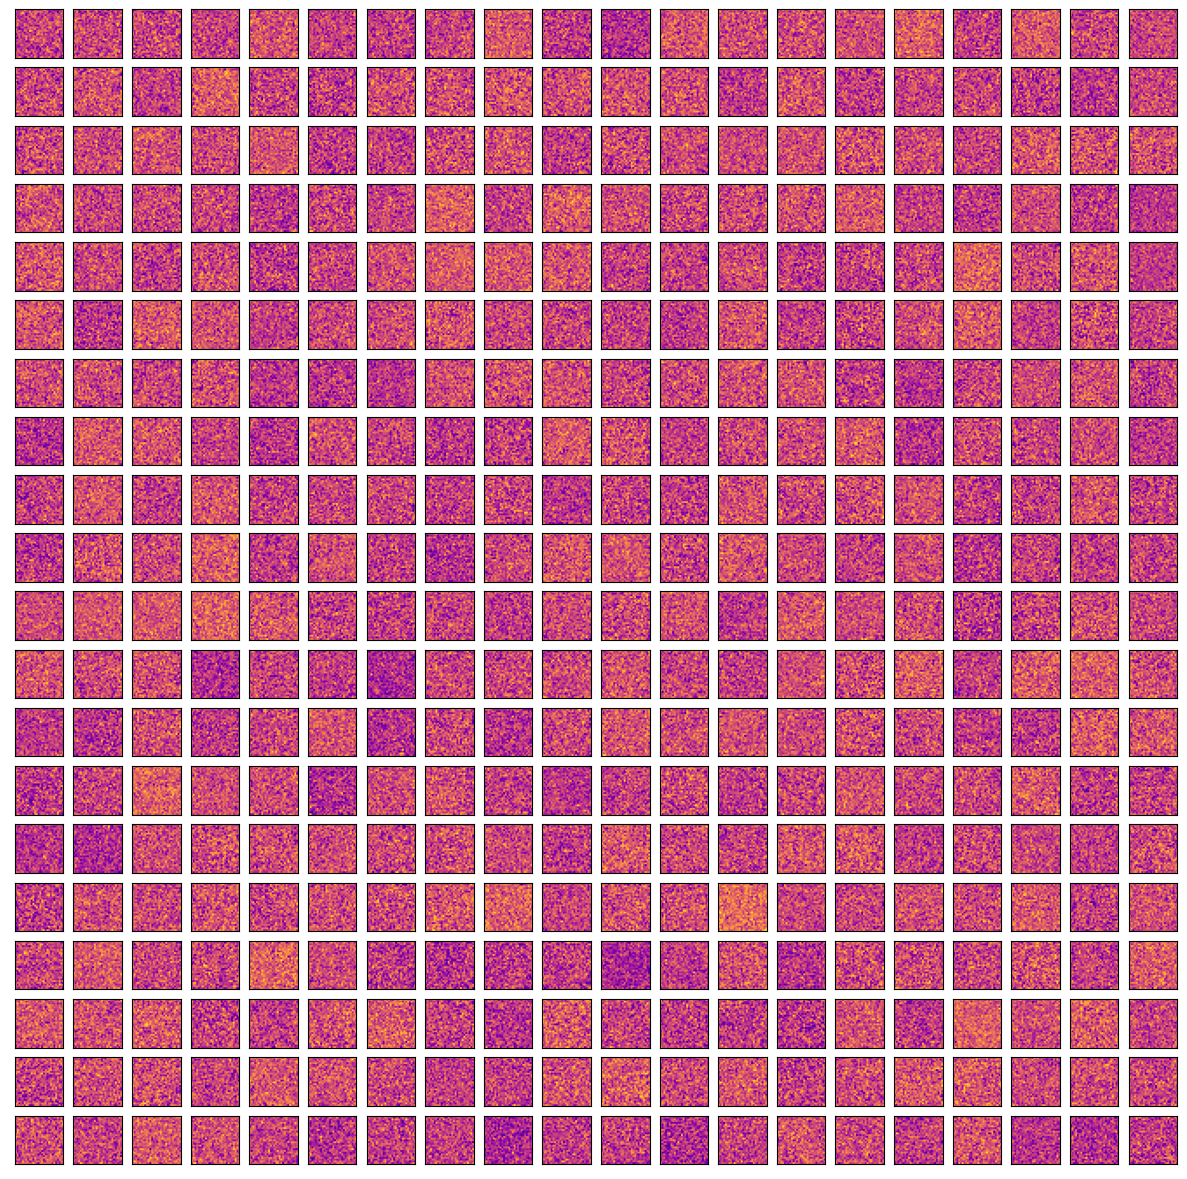

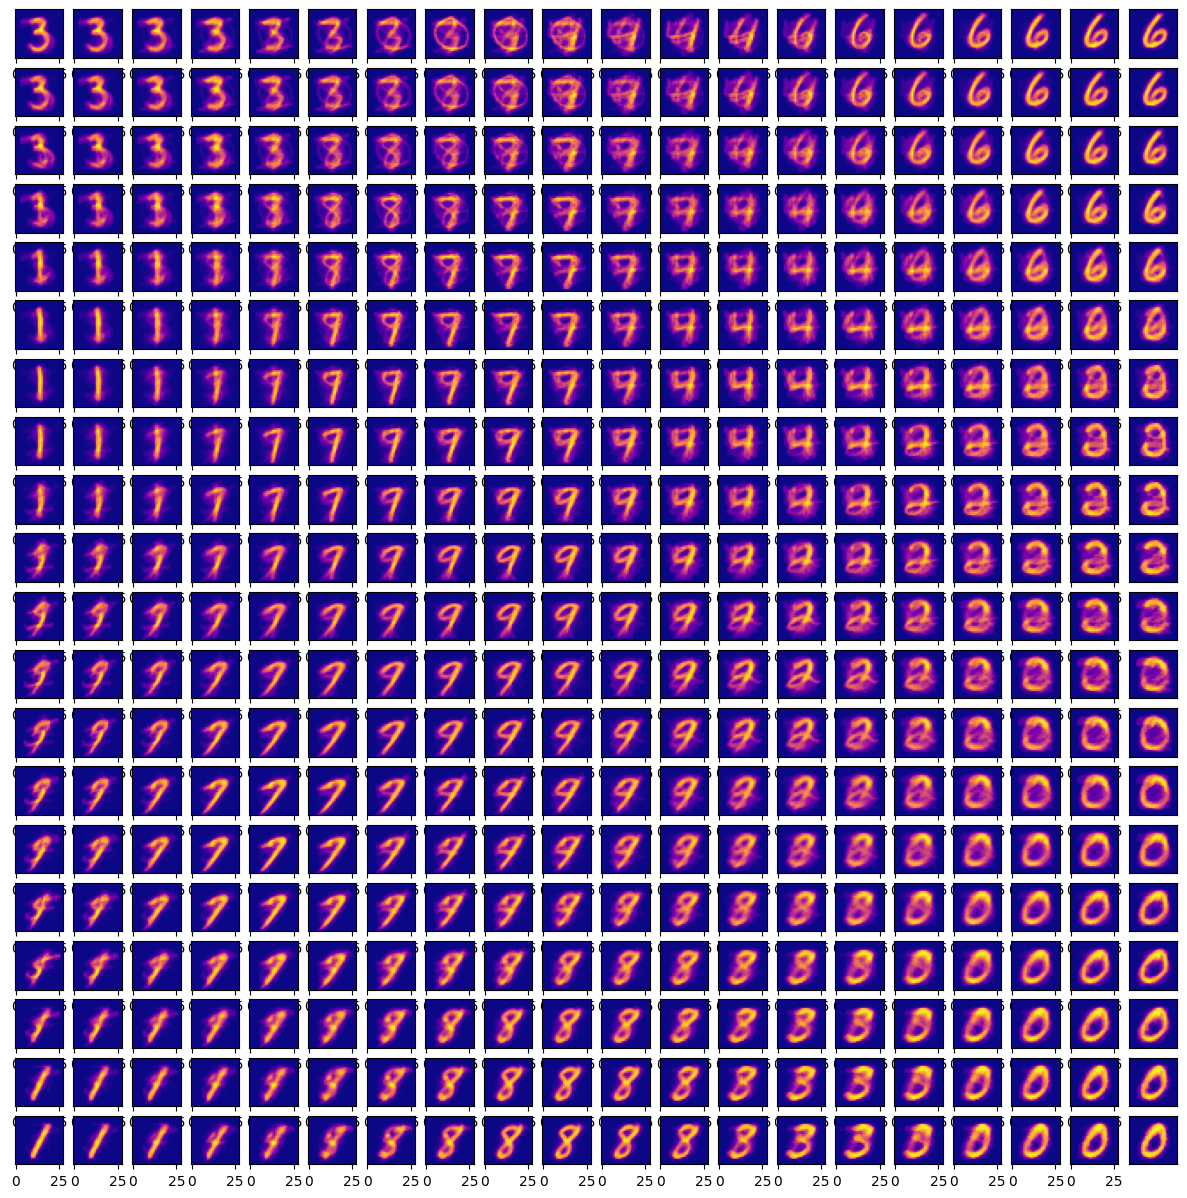

In [12]:
ndim20 = 20
ndim40 = 40
ndim80 = 80

som_trained_20x20 = SOM([28, 28], train_images_flattened, ndim=ndim20, nepochs=100, showMode=1)

print(som_trained_20x20)

plt.show()


In [13]:
#verification of correctness on the training set:


def SOM_Test (trainingData, som_, classes, grid_, confusion_matrix, ndim=60):
    nfeatures=trainingData.shape[1]
    ntrainingvectors=trainingData.shape[0]
    
    nrows = ndim
    ncols = ndim
    
    nclasses=np.max(classes)

    som_cl=np.zeros((ndim,ndim,nclasses+1))
    
    
    for ntraining in range(ntrainingvectors):
        trainingVector = trainingData[ntraining,:];
        class_of_sample= classes[ntraining]    
        # Compute the Euclidean distance between the training vector and
        # each neuron in the SOM map
        dist = getEuclideanDistance(trainingVector, som_);
       
        # Find 2D coordinates of the Best Matching Unit (bmu)
        bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) ;
        
        
        som_cl[bmurow, bmucol,class_of_sample]=som_cl[bmurow, bmucol,class_of_sample]+1
    
    
    
    for i in range (nrows):
        for j in range (ncols):
            grid_[i,j]=np.argmax(som_cl[i,j,:])

 
    for ntraining in range(ntrainingvectors):
        trainingVector = trainingData[ntraining,:];
        class_of_sample= classes[ntraining]    
        # Compute the Euclidean distance between the training vector and
        # each neuron in the SOM map
        dist = getEuclideanDistance(trainingVector, som_);
       
        # Find 2D coordinates of the Best Matching Unit (bmu)
        bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) ;
        
        predicted=np.argmax(som_cl[bmurow, bmucol,:])
        confusion_matrix[class_of_sample-1, predicted-1]=confusion_matrix[class_of_sample-1, predicted-1]+1
        
    return grid_, confusion_matrix
    



In [14]:
def get_confusion_matrix(train_images, SOM, ndim=20):
    nrows=ndim
    ncols=ndim
    grid_color=np.zeros((nrows,ncols))
    nclasses=np.max(classes)

    confusion_matrix=np.zeros((nclasses,nclasses))
    grid_color,confusion_matrix=SOM_Test (train_images, SOM, classes, grid_color, confusion_matrix, ndim)

    plt.close()
    plt.imshow(grid_color)
    plt.show()

    return confusion_matrix, train_images_flattened.shape, np.sum(confusion_matrix)

In [15]:
def calulate_accuracy(confusion_matrix):
    true_positives = np.trace(confusion_matrix)
    total_samples = np.sum(confusion_matrix)
    accuracy = true_positives / total_samples

    print("Accuracy:", accuracy)

Training Set


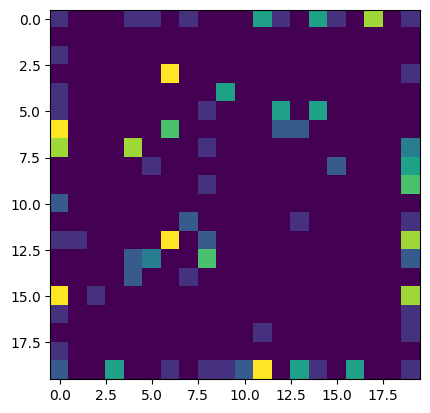

[[40.  1.  0.  0.  0.  0.  0.]
 [ 5. 14.  0.  0.  0.  0.  0.]
 [ 3.  0.  2.  0.  0.  0.  0.]
 [ 3.  0.  0.  9.  0.  0.  1.]
 [ 0.  0.  0.  1.  3.  0.  0.]
 [ 2.  1.  0.  0.  0.  5.  0.]
 [ 2.  2.  0.  0.  0.  0.  6.]]
Accuracy: 0.79
Test Set


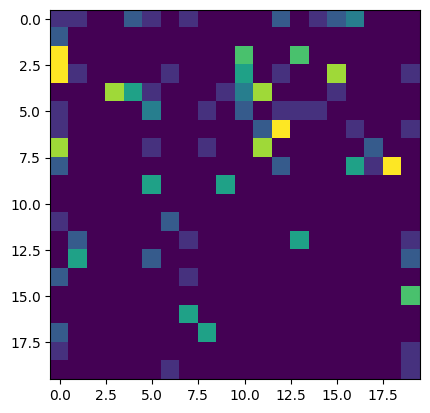

[[40.  0.  0.  0.  0.  0.  1.]
 [ 4. 15.  0.  0.  0.  0.  0.]
 [ 2.  0.  3.  0.  0.  0.  0.]
 [ 2.  1.  0.  9.  0.  0.  1.]
 [ 1.  0.  0.  0.  3.  0.  0.]
 [ 2.  0.  0.  0.  0.  5.  1.]
 [ 1.  1.  2.  0.  0.  0.  6.]]


In [16]:
print("Training Set")
confusion_matrix, shape, sum_matrix = get_confusion_matrix(train_images_flattened, som_trained_20x20, ndim20)
print(confusion_matrix)
calulate_accuracy(confusion_matrix)

print("Test Set")
confusion_matrix, shape, sum_matrix = get_confusion_matrix(test_images_flattened, som_trained_20x20, ndim20)
print(confusion_matrix)

### Question 6: What is the resulting effect of changing learning rate with a fixed number of itterations

It increases up to the learning rate of 0.75 and then seems to decrease.


--- Training with learning rate: 0.01 ---


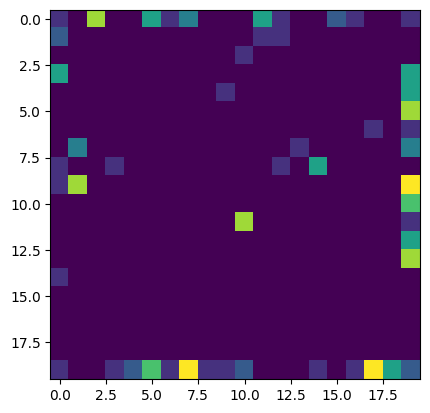

[[38.  3.  0.  0.  0.  0.  0.]
 [11.  8.  0.  0.  0.  0.  0.]
 [ 2.  0.  3.  0.  0.  0.  0.]
 [ 5.  0.  0.  8.  0.  0.  0.]
 [ 1.  0.  0.  1.  2.  0.  0.]
 [ 2.  0.  0.  1.  0.  5.  0.]
 [ 3.  2.  0.  1.  0.  1.  3.]]
Accuracy: 0.67

--- Training with learning rate: 0.1 ---


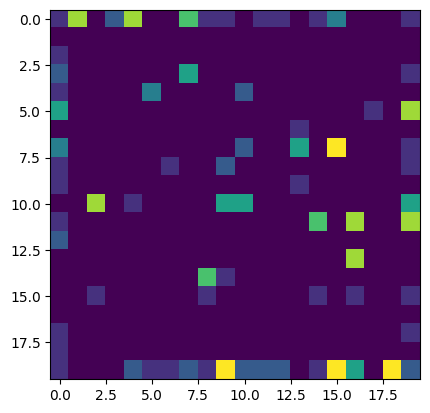

[[40.  1.  0.  0.  0.  0.  0.]
 [ 4. 15.  0.  0.  0.  0.  0.]
 [ 1.  1.  3.  0.  0.  0.  0.]
 [ 5.  1.  0.  7.  0.  0.  0.]
 [ 1.  0.  0.  0.  3.  0.  0.]
 [ 1.  0.  0.  0.  0.  7.  0.]
 [ 1.  3.  0.  1.  0.  1.  4.]]
Accuracy: 0.79

--- Training with learning rate: 0.25 ---


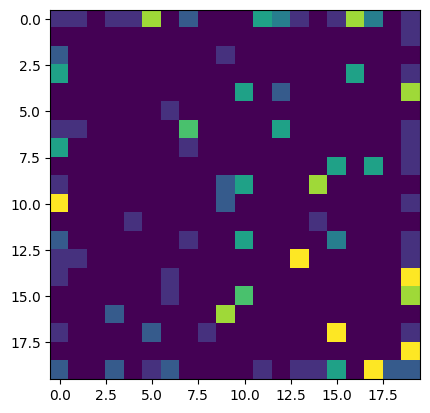

[[40.  1.  0.  0.  0.  0.  0.]
 [ 4. 15.  0.  0.  0.  0.  0.]
 [ 1.  1.  3.  0.  0.  0.  0.]
 [ 2.  0.  0. 11.  0.  0.  0.]
 [ 2.  0.  0.  0.  2.  0.  0.]
 [ 0.  2.  0.  0.  0.  6.  0.]
 [ 2.  1.  0.  0.  0.  1.  6.]]
Accuracy: 0.83

--- Training with learning rate: 0.5 ---


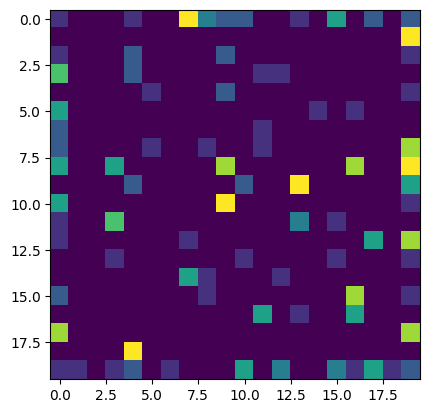

[[40.  1.  0.  0.  0.  0.  0.]
 [ 2. 17.  0.  0.  0.  0.  0.]
 [ 0.  1.  4.  0.  0.  0.  0.]
 [ 1.  0.  0. 12.  0.  0.  0.]
 [ 1.  0.  0.  1.  2.  0.  0.]
 [ 0.  1.  0.  0.  0.  7.  0.]
 [ 0.  2.  0.  1.  0.  1.  6.]]
Accuracy: 0.88

--- Training with learning rate: 0.75 ---


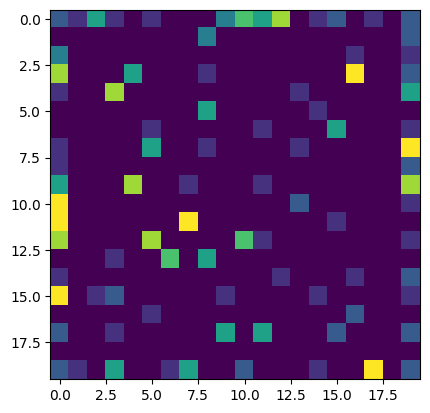

[[41.  0.  0.  0.  0.  0.  0.]
 [ 1. 18.  0.  0.  0.  0.  0.]
 [ 1.  1.  3.  0.  0.  0.  0.]
 [ 0.  0.  0. 13.  0.  0.  0.]
 [ 1.  0.  0.  0.  3.  0.  0.]
 [ 0.  1.  0.  0.  0.  7.  0.]
 [ 0.  3.  0.  0.  0.  0.  7.]]
Accuracy: 0.92

--- Training with learning rate: 0.85 ---


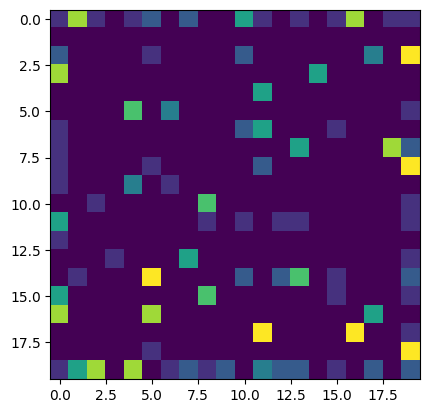

[[40.  1.  0.  0.  0.  0.  0.]
 [ 2. 17.  0.  0.  0.  0.  0.]
 [ 1.  0.  4.  0.  0.  0.  0.]
 [ 2.  1.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  8.  0.]
 [ 0.  2.  0.  1.  0.  1.  6.]]
Accuracy: 0.89

--- Training with learning rate: 0.95 ---


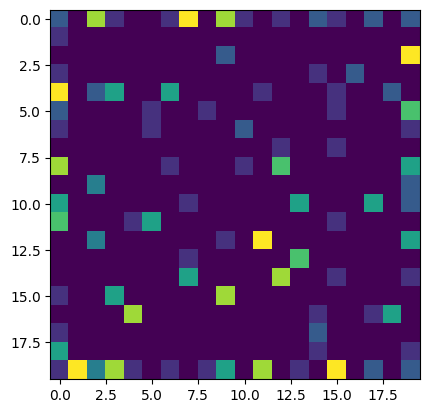

[[41.  0.  0.  0.  0.  0.  0.]
 [ 3. 16.  0.  0.  0.  0.  0.]
 [ 1.  1.  3.  0.  0.  0.  0.]
 [ 0.  0.  0. 13.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  8.  0.]
 [ 0.  2.  0.  1.  0.  1.  6.]]
Accuracy: 0.91


In [17]:
learning_rates = [0.01, 0.1, 0.25, 0.5, 0.75, 0.85, 0.95]

for learning_rate in learning_rates:
    print(f"\n--- Training with learning rate: {learning_rate} ---")
    som = SOM([28, 28], train_images_flattened, ndim=ndim20, nepochs=100, eta0=learning_rate, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=0)
    confusion_matrix, shape, sum_matrix = get_confusion_matrix(train_images_flattened, som, ndim20)
    print(confusion_matrix)
    calulate_accuracy(confusion_matrix)

### Question 7/8: For a fixed number of iterations what is the effect of increasing exponental decay of the neighbourhood parameter

It seems to increase the accuracy (atleast until 0.5).

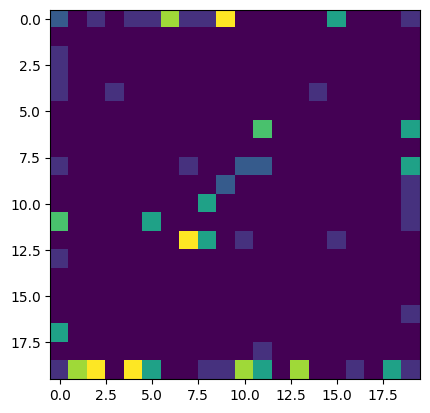

[[38.  3.  0.  0.  0.  0.  0.]
 [10.  9.  0.  0.  0.  0.  0.]
 [ 4.  1.  0.  0.  0.  0.  0.]
 [ 2.  0.  0. 11.  0.  0.  0.]
 [ 1.  1.  0.  0.  2.  0.  0.]
 [ 3.  0.  0.  0.  1.  4.  0.]
 [ 5.  1.  0.  0.  0.  0.  4.]]
Accuracy: 0.68


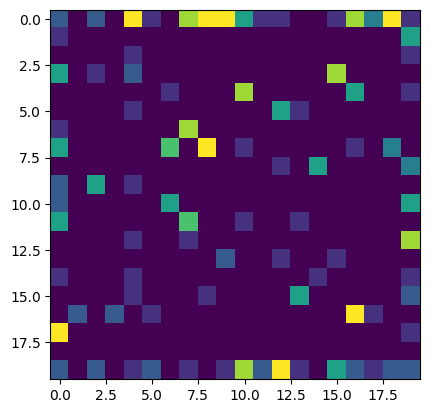

[[41.  0.  0.  0.  0.  0.  0.]
 [ 2. 17.  0.  0.  0.  0.  0.]
 [ 1.  1.  3.  0.  0.  0.  0.]
 [ 0.  0.  0. 13.  0.  0.  0.]
 [ 1.  0.  0.  1.  2.  0.  0.]
 [ 0.  1.  0.  0.  0.  7.  0.]
 [ 0.  2.  0.  0.  0.  0.  8.]]
Accuracy: 0.91


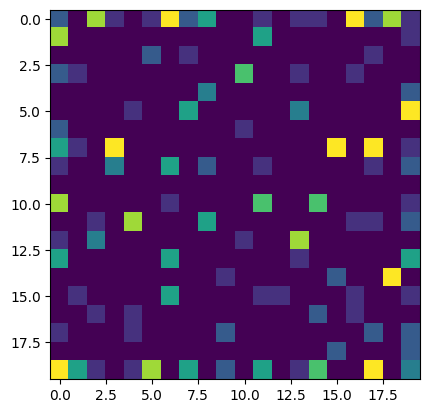

[[41.  0.  0.  0.  0.  0.  0.]
 [ 1. 18.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.]
 [ 0.  0.  0. 13.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  7.  1.]
 [ 0.  0.  0.  0.  0.  0. 10.]]
Accuracy: 0.98


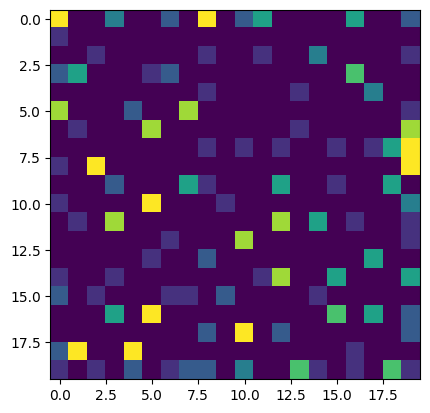

[[41.  0.  0.  0.  0.  0.  0.]
 [ 1. 18.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.]
 [ 0.  0.  0. 13.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  8.  0.]
 [ 0.  0.  0.  0.  0.  0. 10.]]
Accuracy: 0.99


In [18]:
decay_values = [0.01, 0.05, 0.1, 0.5]
for decay_value in decay_values:
    som = SOM([28, 28], train_images_flattened, ndim=20, nepochs=100, eta0=0.75, etadecay=0.05, sgm0=20, sgmdecay=decay_value, showMode=0)

    confusion_matrix, shape, sum_matrix = get_confusion_matrix(train_images_flattened, som, ndim20)
    print(confusion_matrix)
    calulate_accuracy(confusion_matrix)

### Question 9: What is a biological neuron? How does it relate to the concept of neurons in SOM?

Biological neurons send binary "fire or not fire" signals while artificial neurons send continious values
